In [4]:
import pandas as pd # standard
import numpy as np # standard
from sklearn import tree # package to make decision tree
from sklearn.metrics import accuracy_score # for accuracy calculation
from sklearn.model_selection import StratifiedKFold # stratified k fold indices

import matplotlib.pyplot as plt

#from sklearn.tree import export_graphviz
#import graphviz

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [5]:
# read in data
df = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")

# replace NA with control
df['CancerType'] = np.where(df['CancerType'].isna(), 'Control', df['CancerType'])

# keep only Control and Adenocarcinoma for analysis
df_tree = df[(df['CancerType'] == 'Control') | (df['CancerType'] == 'Adenocarcinoma')]

In [6]:
# create empty df to store cv results
performance_metrics = pd.DataFrame(columns=['Train', 'Test', 'Train Accuracy', 'Test Accuracy'])

# define the number of splits and random seed for StratifiedKFold
n_splits = 5
random_seed = 42
skf = StratifiedKFold(n_splits=n_splits, random_state=random_seed, shuffle=True)

# initialize lists to store train and test indices
train_indices_list = []
test_indices_list = []

# loop through the splits and extract train and test indices
for train_indices, test_indices in skf.split(df_tree, df_tree['CancerType']):

    # append train and test indices to their lists
    train_indices_list.append(train_indices)
    test_indices_list.append(test_indices)

# access the rows of the thermogram df using the indices
for fold in range(n_splits):

    # get training and testing dataframes
    train_df = df_tree.iloc[train_indices_list[fold]].drop(['sample_id', 'pub_id'], axis = 1)
    test_df = df_tree.iloc[test_indices_list[fold]].drop(['sample_id', 'pub_id'], axis = 1)
    
    # train the decision tree using the train set
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit( train_df.drop('CancerType', axis = 1), train_df['CancerType'])

    # predict the train set / test set
    train_predictions = clf.predict(train_df.drop('CancerType', axis = 1))
    test_predictions = clf.predict(test_df.drop('CancerType', axis = 1))

    # compare predictions to labels
    test_accuracy = accuracy_score(test_predictions, test_df['CancerType'])
    train_accuracy = accuracy_score(train_predictions, train_df['CancerType'])

    # store train/test indices and accuracy
    performance_metrics.loc[len(performance_metrics)] = [train_indices_list[fold], test_indices_list[fold], train_accuracy, test_accuracy]

    feature_importance = clf.feature_importances_



Text(0.5, 1.0, 'Bar Plot of Temperature vs. Importance')

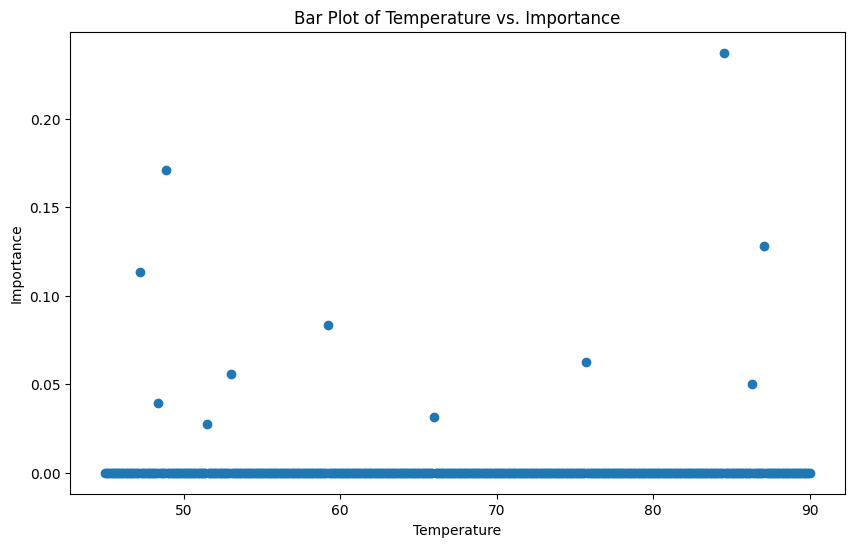

In [10]:
variable_importance_df = pd.DataFrame({'temperature': train_df.drop('CancerType', axis = 1).columns, 'importance': feature_importance})
variable_importance_df['temperature'] = variable_importance_df['temperature'].str.replace("T", '')

variable_importance_df = variable_importance_df.apply(pd.to_numeric, errors='ignore')

plt.figure(figsize=(10, 6))

# create a bar plot
plt.scatter(variable_importance_df['temperature'], variable_importance_df['importance'])

# add labels and title
plt.xlabel('Temperature')
plt.ylabel('Importance')
plt.title('Bar Plot of Temperature vs. Importance')